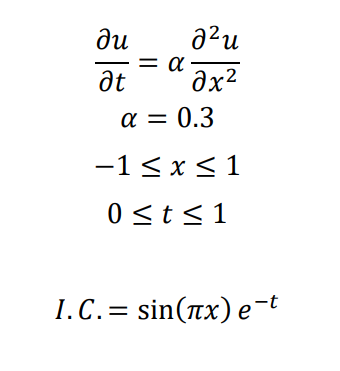

In [25]:
import numpy as np
import deepxde as dde
import matplotlib.pyplot as plt

# Jacobian Matrix recap
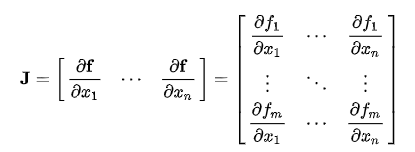

# Hessian Matrix recap
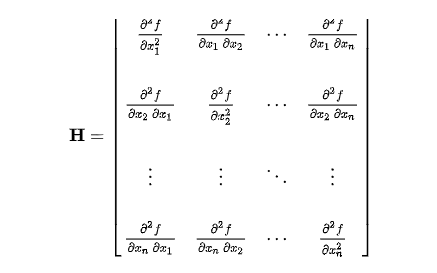

In [26]:
def pde(x, y):
    dy_t = dde.grad.jacobian(y, x, j=1)
    dy_xx = dde.grad.hessian(y, x, j=0)
    return (dy_t - dy_xx*0.3)

In [27]:
geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geotime = dde.geometry.GeometryXTime(geom, timedomain)

In [28]:
def ini_func(x):
    return np.sin(np.pi*x[:, 0:1]) * np.exp(-x[:, 1:])

In [29]:
bc = dde.DirichletBC(geotime, ini_func, lambda _, on_boundary : on_boundary)
ic = dde.IC(geotime, ini_func, lambda _, on_initial: on_initial)

In [30]:
data = dde.data.TimePDE(
    geotime,
    pde,
    [bc, ic],
    num_domain = 4000,
    num_boundary = 2000,
    num_initial = 1000,
    solution = ini_func,
    num_test = 1000,
)

In [31]:
layer_size = [2] + [32]*3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
optimizer = "adam"
net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile(optimizer, lr = 0.001, metrics = ["l2 relative error"])

losshistory, train_state = model.train(epochs = 10000)

Compiling model...
Building feed-forward neural network...
'build' took 0.085447 s

'compile' took 0.518335 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric   
0         [8.63e-03, 5.99e-02, 7.00e-01]    [7.09e-03, 5.99e-02, 7.00e-01]    [1.28e+00]    
1000      [6.97e-04, 1.16e-03, 5.98e-04]    [6.53e-04, 1.16e-03, 5.98e-04]    [2.85e-01]    
2000      [2.21e-04, 5.29e-05, 4.87e-05]    [2.35e-04, 5.29e-05, 4.87e-05]    [2.81e-01]    
3000      [9.80e-05, 7.97e-06, 1.96e-05]    [1.13e-04, 7.97e-06, 1.96e-05]    [2.81e-01]    
4000      [6.65e-05, 7.03e-06, 1.25e-05]    [7.58e-05, 7.03e-06, 1.25e-05]    [2.82e-01]    
5000      [3.39e-04, 4.11e-05, 4.38e-05]    [3.24e-04, 4.11e-05, 4.38e-05]    [2.79e-01]    
6000      [3.57e-05, 2.21e-06, 4.32e-06]    [4.02e-05, 2.21e-06, 4.32e-06]    [2.81e-01]    
7000      [3.47e-05, 7.64e-06, 7.51e-06]    [3.60e-05, 7.64e-06, 7.51e-06]    [2.81e-01]    
8000   

In [32]:
x_data = np.linspace(-1, 1, num = 1000)
t_data = np.linspace(0, 1,num= 100)
test_x, test_t = np.meshgrid(x_data, t_data)
test_domain = np.vstack((np.ravel(test_x), np.ravel(test_t))).T
predicted_solution = model.predict(test_domain)
residual = model.predict(test_domain, operator = pde)

In [33]:
test_domain.shape

(100000, 2)

Saving loss history to C:\Users\kozak\Desktop\國網中心\DIY_XDE\Heat_equation\loss.dat ...
Saving training data to C:\Users\kozak\Desktop\國網中心\DIY_XDE\Heat_equation\train.dat ...
Saving test data to C:\Users\kozak\Desktop\國網中心\DIY_XDE\Heat_equation\test.dat ...


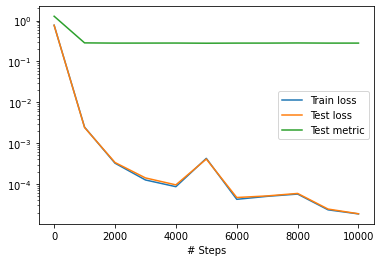

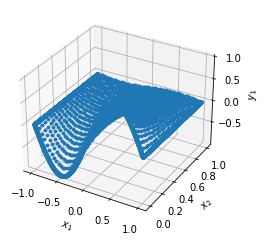

In [34]:
dde.saveplot(losshistory, train_state, isplot= True)

In [35]:
predicted_solution = predicted_solution.reshape(100, 1000)
residual = residual.reshape(100, 1000)

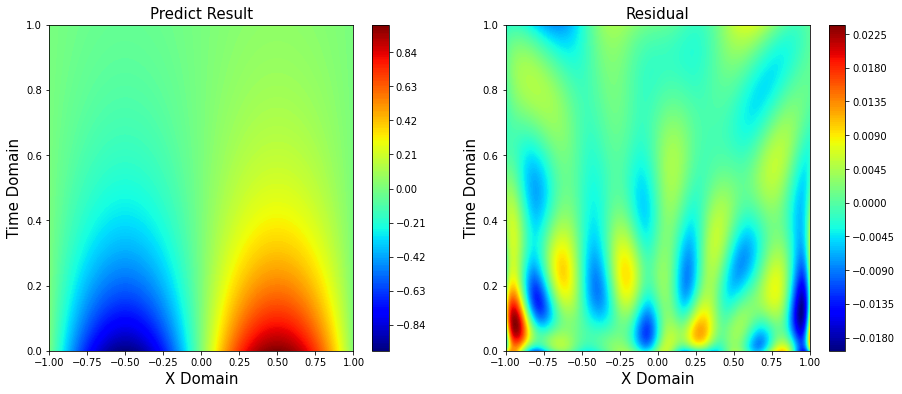

In [36]:
fig = plt.figure(figsize = (15, 6))
ax = fig.add_subplot(1, 2, 1)
ax.set_title("Predict Result", fontsize = 15)
ax.set_xlabel("X Domain", fontsize = 15)
ax.set_ylabel("Time Domain", fontsize = 15)
cs = ax.contourf(x_data, t_data, predicted_solution, 200, cmap = "jet")
cbar = fig.colorbar(cs)


ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Residual", fontsize = 15)
ax2.set_xlabel("X Domain", fontsize = 15)
ax2.set_ylabel("Time Domain", fontsize = 15)
cs2 = ax2.contourf(x_data, t_data, residual, 200, cmap = "jet")
cbar2 = fig.colorbar(cs2)


plt.show()